# 1. 
This problem involves hyperplanes in two dimensions.

## (a) 
Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points for which 1 + 3X1 − X2 < 0.

## (b) 
On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2+ X1 +2X2 > 0, as well
as the set of points for which −2+ X1 + 2X2 < 0.

In [1]:
x1 <- -10:10
x2 <- 1 + 3 * x1

x3 <- -2 + x1 + (2*x2) 

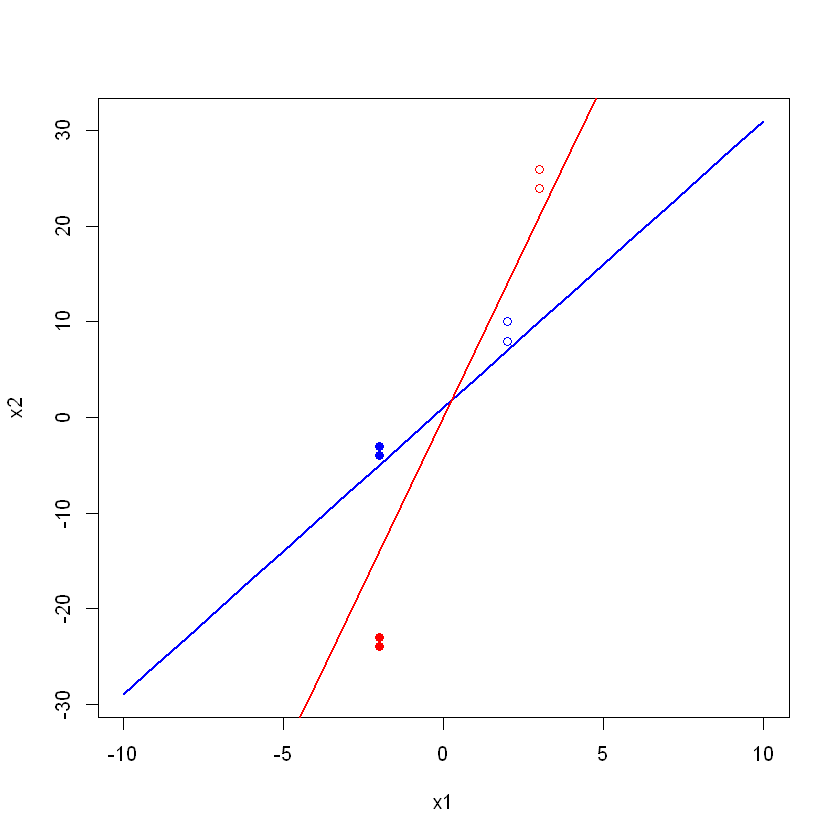

In [2]:
plot(
    x1, 
    x2, 
    type = "l", 
    col = "blue",
    lwd=2
)
lines(x1, x3, col = "red", lwd=2)

# 1 + 3X1 − X2 > 0
points(2, 10,col="blue")
points(2, 8,col="blue")

# 1 + 3X1 − X2 < 0
points(-2, -4, col="blue", pch=16)
points(-2, -3, col="blue", pch=16)


# −2+ X1 +2X2 > 0
points(3, 26,col="red")
points(3, 24,col="red")

# −2+ X1 +2X2 < 0
points(-2, -24, col="red", pch=16)
points(-2, -23, col="red", pch=16)

# 4
Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

- Both the radial and polynomial kernels outperform the SVC on the training data. However,
- the radial kernel performs the best on the test set misclassifying only 11% of the observations in total

In [3]:
# ref: 9.6.2
set.seed (1)

x = matrix(rnorm (200*2), ncol =2)
x[1:100 ,] = x[1:100 ,]+2
x[101:150 ,] = x[101:150 ,] -2
y = c(rep (1 ,150), rep(2 ,50) )

dat = data.frame(x=x, y=as.factor(y))
train=sample(200 ,100)
length(train)

[1] 100

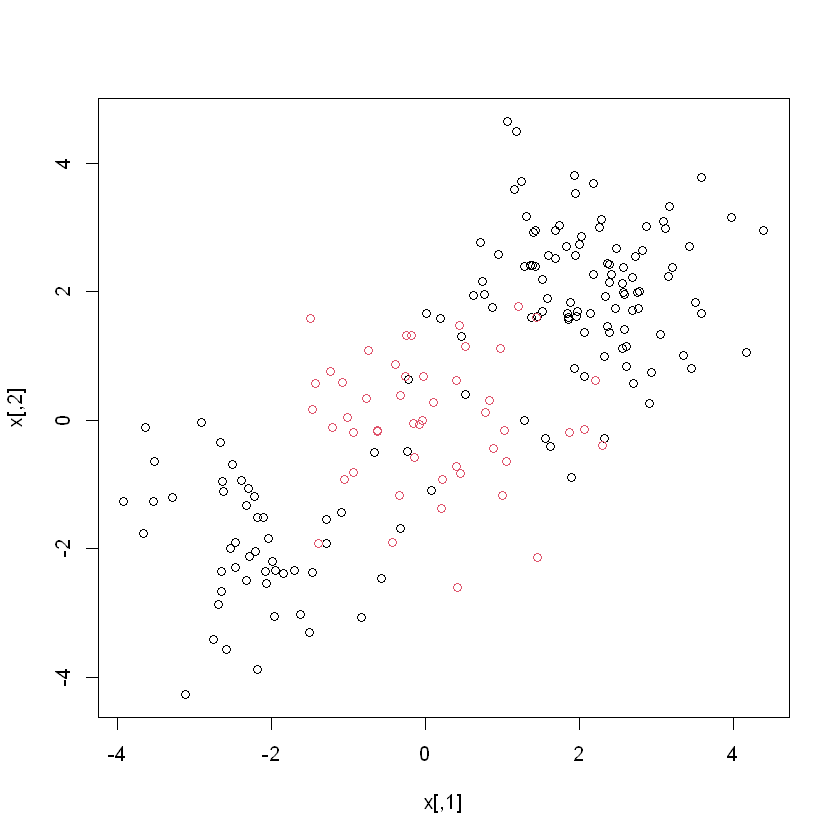

In [4]:
plot(x, col=y)

In [5]:
library(e1071)

In [6]:
bench <- function(k, degree=0) {
    tune.out = tune(svm, 
                    y~., 
                    data=dat[train ,], 
                    kernel = k, 
                    degree=degree,
                    ranges = list(cost=c(0.1, 1, 2, 5, 10), 
                    gamma=c(0.1, 1, 2, 5, 10))
                   )
    return (tune.out)
}

In [7]:
validate <- function(tuned, test_y=dat[-train ,"y"], test_x=dat[-train ,]) {
    tbl <- table(true=test_y, pred=predict (tuned$best.model, newdata=test_x ))
    
    print(tbl)

    fp <- tbl[2]
    fn <- tbl[3]
    
    # percent misclassified
    print((fp+fn) / 100)
    
    plot(tuned$best.model, test_x)
}

In [8]:
train_y = dat[train, "y"]
train_x = dat[train, ]

# Show that in this setting, a support vector
# machine with a polynomial kernel (with degree greater than 1) or a
# radial kernel will outperform a support vector classifier on the training
# data.


linear = bench('linear')
radial = bench('radial')
poly.d2 = bench('polynomial', degree=2)

    pred
true  1  2
   1 73  0
   2 27  0
[1] 0.27


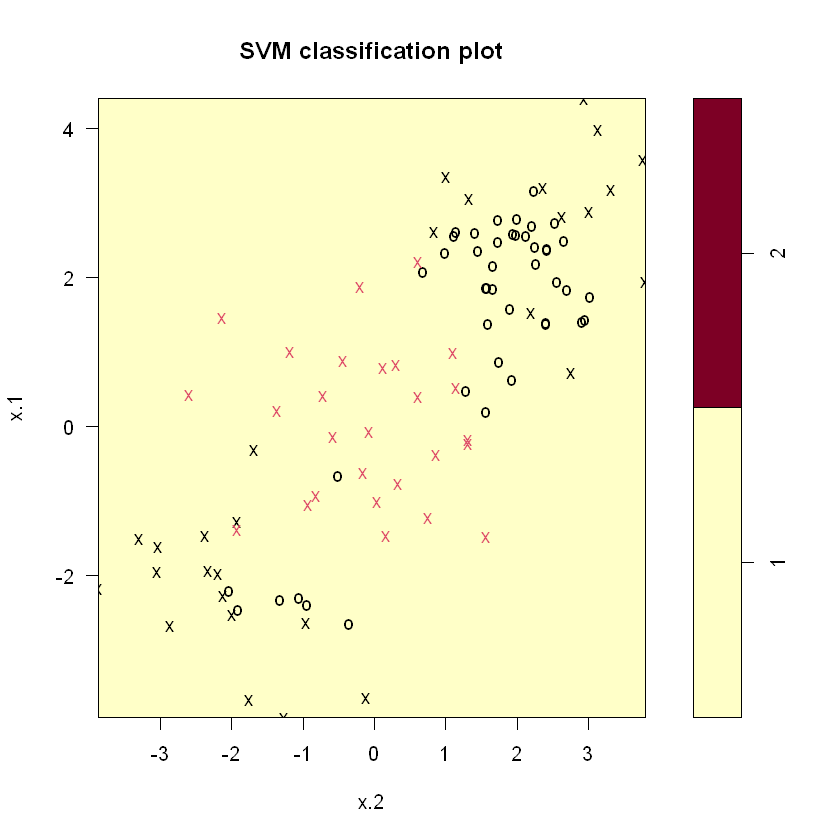

In [9]:
validate(linear, test_y=train_y, test_x=train_x)

    pred
true  1  2
   1 69  4
   2  2 25
[1] 0.06


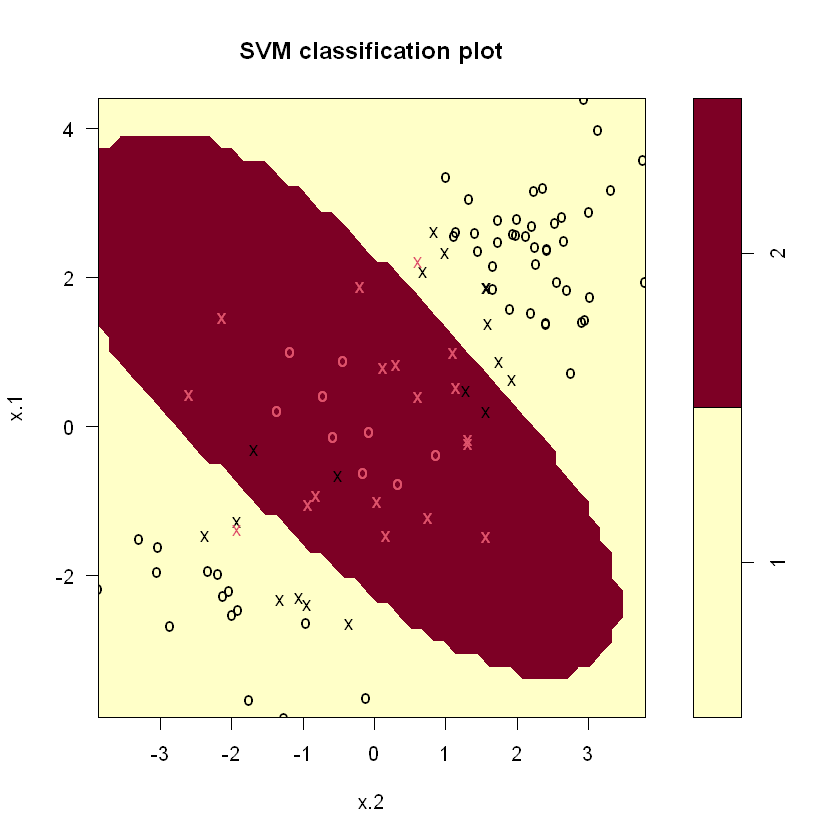

In [10]:
validate(radial, test_y=train_y, test_x=train_x)

    pred
true  1  2
   1 66  7
   2  9 18
[1] 0.16


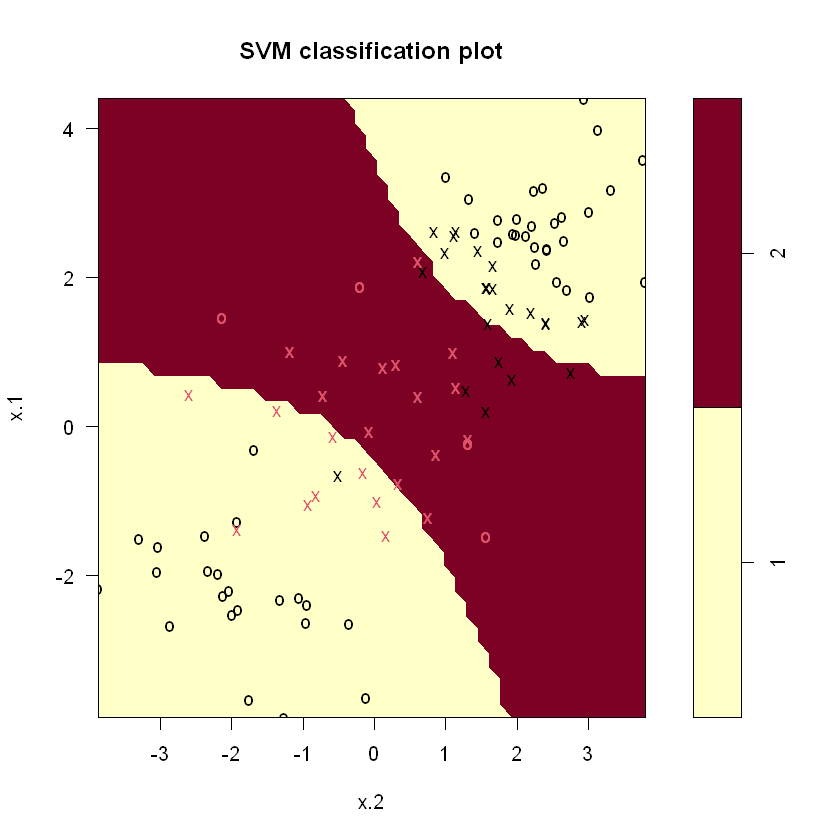

In [11]:
validate(poly.d2, test_y=train_y, test_x=train_x)

    pred
true  1  2
   1 66 11
   2  2 21
[1] 0.13


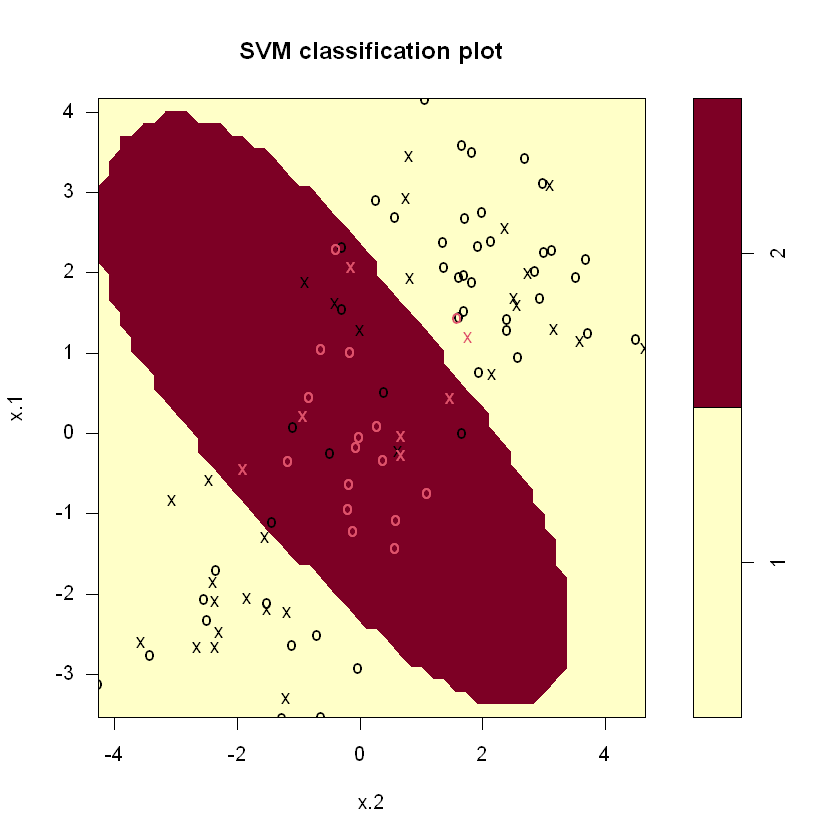

In [12]:
# test data
validate(radial)

    pred
true  1  2
   1 64 13
   2  6 17
[1] 0.19


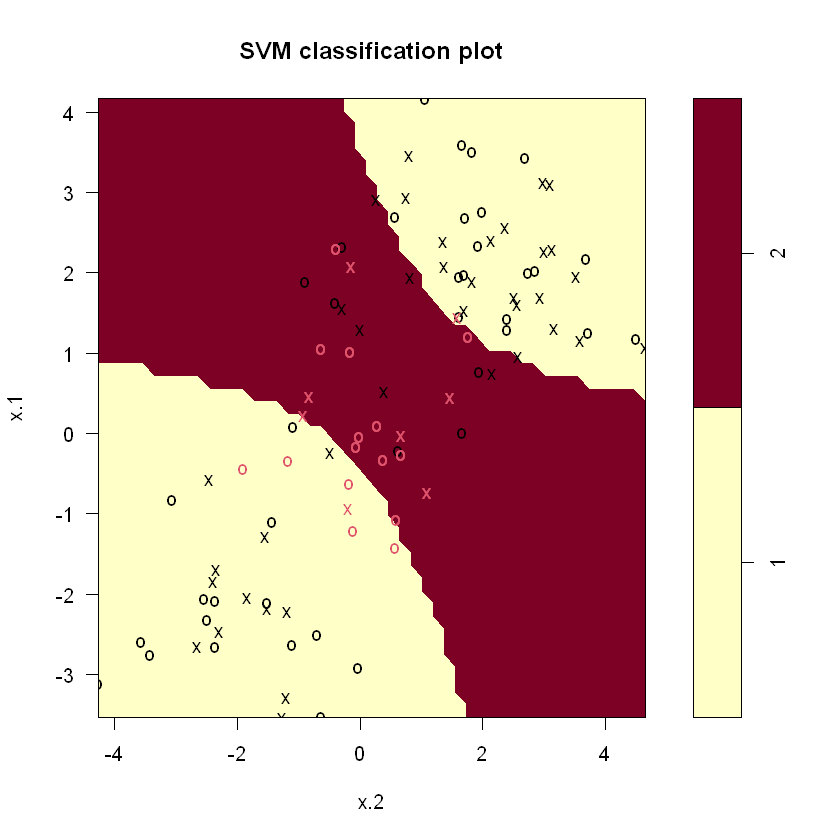

In [13]:
validate(poly.d2)

# 7

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

## (a) 
Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.

In [14]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 4.2.2"


In [15]:
mdn <- median(Auto$mpg)
mdn

[1] 22.75

In [16]:
Auto['mlg_ind'] <- ifelse(Auto$mpg > mdn, 1, 0)

a.train <- sample(nrow(Auto ), nrow(Auto )* 0.7)

length(a.train)/length(Auto$mlg_ind)

[1] 0.6989796

## (b) 
Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results.

- Applying a 10-fold cross-validation, the best parameters were a cost of 1, and a gamma of 0.1

In [17]:
tune.7 = tune(svm, 
              mlg_ind~., 
              data=Auto[a.train ,], 
              kernel = 'linear', 
              ranges = list(cost=c(0.1, 1, 2, 5, 10), 
              gamma=c(0.1, 1, 2, 5, 10))
            )
tune.7


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.06849709 


In [18]:
tune.7$performances

cost,gamma,error,dispersion
<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.1,0.07777676,0.04356275
1.0,0.1,0.06849709,0.02599876
2.0,0.1,0.06876570,0.02745822
5.0,0.1,0.07274850,0.03020259
10.0,0.1,0.08085457,0.03233910
0.1,1.0,0.07777676,0.04356275
1.0,1.0,0.06849709,0.02599876
2.0,1.0,0.06876570,0.02745822
5.0,1.0,0.07274850,0.03020259


## (c) 

Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results.

- The radial kernel produces a large of number of support vectors indicating a wide margin with many observations violating the margin. The polynomial produces an even larger number of support vectors than the radial. However, both kernel basis classify correctly ~95% of the time.

In [19]:
tune.7r = tune(svm, 
              mlg_ind~., 
              data=Auto[a.train ,], 
              kernel = 'radial', 
              ranges = list(cost=c(0.1, 1, 2, 5, 10), 
              gamma=c(0.1, 1, 2, 5, 10))
            )
tune.7r$best.model


Call:
best.tune(method = svm, train.x = mlg_ind ~ ., data = Auto[a.train, 
    ], ranges = list(cost = c(0.1, 1, 2, 5, 10), gamma = c(0.1, 1, 
    2, 5, 10)), kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  156


In [20]:
a.test_y = Auto[-a.train , 'mlg_ind']
a.test_x = Auto[-a.train, ]

prob <- predict(tune.7r$best.model, a.test_x)
pred <- ifelse(prob>0.5, 1, 0)

table(a.test_y, pred)

        pred
a.test_y  0  1
       0 57  2
       1  4 55

In [64]:
(6/length(a.test_y))

[1] 0.05084746

In [62]:
tune.7p.d3 = tune(svm, 
              mlg_ind~., 
              data=Auto[a.train ,], 
              kernel = 'polynomial', 
              ranges = list(
                  cost=c(0.1, 1, 2, 5, 10), 
                  gamma=c(0.1, 1, 2, 5, 10),
                  degree=c(2,3,4))
            )
tune.7p.d3$best.model

prob.7p.d3 <- predict(tune.7p.d3$best.model, a.test_x)
pred.7p.d3 <- ifelse(prob.7p.d3>0.5, 1, 0)

table(a.test_y, pred.7p.d3)


Call:
best.tune(method = svm, train.x = mlg_ind ~ ., data = Auto[a.train, 
    ], ranges = list(cost = c(0.1, 1, 2, 5, 10), gamma = c(0.1, 1, 
    2, 5, 10), degree = c(2, 3, 4)), kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  2 
     degree:  3 
      gamma:  0.1 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  219


        pred.7p.d3
a.test_y  0  1
       0 56  3
       1  3 56

In [63]:
(6/length(a.test_y))

[1] 0.05084746

## (d) 

Make some plots to back up your assertions in (b) and (c).
Hint: In the lab, we used the plot() function for svm objects
only in cases with p = 2. When p > 2, you can use the plot()
function to create plots displaying pairs of variables at a time.
Essentially, instead of typing
`> plot(svmfit , dat)`
where svmfit contains your fitted model and dat is a data frame
containing your data, you can type
`> plot(svmfit , dat , x1∼x4)`
in order to plot just the first and fourth variables. However, you
must replace x1 and x4 with the correct variable names. To find
out more, type ?plot.svm.

In [25]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mlg_ind"

In [77]:
plot(tune.7r$best.model, a.test_x , weight~horsepower)